<img src="./Assets/Pics/EOSc-Pillar_logo_final.png"/>

# Applied Physics and 1D Convolutional Neural Networks

<img src="./Assets/Pics/Logo_INFN_CHNet_esteso.png" alt="Drawing" style="width: 200px; float: right"/>

The goal of this lecture is to give a brief introduction to how to apply Deep Neural Networks on Physical Imaging of Cultural Heritages, such as drawings, paintings or frescoes. 

## 1. Physical Imaging using spectroscopic techniques

<img src="./Assets/Pics/labec.png" alt="Drawing" style="width: 180px; float: left; margin-right: 10px; margin-top: 1em"/>

Here at the INFN, sezione di Firenze, there is the **LABEC**, the *Laboratorio di tecniche nucleari applicate all'Ambiente e ai Beni Culturali*, where a lot of nuclear techniques are applied to the field of Cultural Heritages, from Radiocarbon Dating to Neutron Muography; LABEC is the funder node of the internal network of INFN devoted to application of nuclear techniques to Cultural Heritage, the so-called *Cultural Heritage Network* (**CHNet**).

From all of these techniques, there are some which may be used for Imaging: those are the *Ion Beam Analysis* (IBA), such as the *Particle Induced X-ray Emission* (PIXE) and the *Particle Induces Gamma-ray Emission* (PIGE), and the *X-ray Fluorescence*. 

For the former, an accelerator machine is required, since we need to bombard the analyzed item with nucleons (usually protons, i.e. ionized ${}^1H$, sometimes $\alpha$-particles, i.e. fully-ionized ${}^4_2 He$.

For the latter, instead, we need an *X-ray tube*: it consists in a vacuum tube, with an metallic filament cathode and with a single-element anode; by thermally heating the metallic filament cathod, it starts to emit electrons via a thermoionic process. Those electrons are thus accelerated by a Voltage in the tube ($\sim 10-20 \,\mathrm{KeV}$ ) towards the anode. Hitting the anode, those electrons lose energy by emitting
- *Bremsstrahlung* radiation
- typical Fluorescence lines (see below) of the element(s) constituting the anode. 

<div style="width:100%">
<img src="./Assets/Images/XRF_apparatus_schema.png" alt="Drawing" style="float: left; width: 40%"/>
<img src="./Assets/Images/X-tray-tube-schema.png" alt="Drawing" style="float: right; width: 40%"/>
</div>

The image on the left, is a photo of the Movable XRF scanner for in-situ analysis of CHNet, Firenze. The image on the right is a photo of MACHINA, *Movable Accelerator for Cultural Heritage In-situ Non-destructive Analysis*, developed jointly by INFN, Firenze and CERN. 

<div style="width:100%; margin-top: 3em; margin-bottom: 3em">
<img src="./Assets/Images/XRF_instr.png" alt="Drawing" style="float: left; width: 40%"/>
<img src="./Assets/Images/machina_foto.jpg" alt="Drawing" style="float: right; width: 55%"/>
</div>

### 1.1 X-ray Fluorescence

Among the many physical techniques applied at LABEC , I will mainly focus on the Stimulated X-Ray Fluorescence (XRF); it is the emission of characteristic "secondary" (or fluorescent) X-rays from a material that has been excited by being bombarded with high-energy X-rays.

<img src="https://upload.wikimedia.org/wikipedia/commons/4/41/X-ray_fluorescence_simple_figure.svg" alt="Drawing" style="width: 250px; float: right;"/>

We use a tube emitting a(n almost) uniform electromagnetic radiation, which hits elements in the painted surface; since the incoming radiation has high frequencies (X-ray band, from 0.5 KeV to 29-30 KeV circa), via the *photoelectric effect*, it can excite an electron from an inner orbital, ionizing the atom. This induces the electrons belonging to outer orbitals to fall to the empty inner orbital to fill the hole; in this process, the atom emits a photon, the energy of which is equal to the energy difference of the two orbitals involved. This process is called *fluorescence*. 


Among all the possibile matter/radiation processes, the *photoelectric effect* is the dominant one for energies in this range; its cross section highly depends on $Z$, via its fifth power $Z^5$, and it is inversely proportional to the Energy of the X-ray to the power of $7/2$, i.e.

$$\sigma_{\mathrm{ph}} \propto \frac{Z^5}{E_X^{7/2}} \,.$$

For a given electronic level (which is a characteristic of the element(s) comprising the pigment), the probability is peaked around the characteristic ionization energy, as usual. 

<img src="https://upload.wikimedia.org/wikipedia/commons/2/28/XRFScan.jpg" alt="Drawing"/>

This easily implies that the received spectrum after the X-ray fluorescence is comprised by a set of bands, peaked around the characteristic levels of the possible ionizations of all elements which are present in the pigment(s).

Each element has more than one possible "resonance" in the X-ray window; those are usually labelled by the *Siegbahn notation* [1];

<div style="width:100%">
<img src="./Assets/Images/X-ray_nomenclature.png" alt="Drawing" style="float: left; width: 50%"/>
<img src="./Assets/Images/X-ray_nomenclature_2.png" alt="Drawing" style="float: right; width: 50%"/>
</div>

<img src="./Assets/Images/Orbitals_line_spectroscopy.png" alt="Drawing" style="width: 40%"/>

Values of different kinds of transition energies like $K_α$, $K_β$, $L_α$, $L_β$ etc. for different elements can be found in the NIST X-Ray Transition Energies Database [2].


--------------
[1] http://old.iupac.org/reports/V/spectro/partVIII.pdf

[2] https://physics.nist.gov/PhysRefData/XrayTrans/Html/search.html

For an extensive review on PIXE, PIGE and XRF, see

[3] P. A. Mandò, *Particle‐Induced X‐Ray Emission (PIXE)* https://doi.org/10.1002/9780470027318.a6210.pub3

[4] C. Ruberto, *Elemental maps with X-ray fluorescence*, Ph.D. Thesis, https://core.ac.uk/download/pdf/301572417.pdf

## 1.2. How an XRF raw data is organized 

As explained above, the Raw data obtained from an XRF analysis encodes a set of spectra; in particoular, a raw data encodes a 3-indeces tensor $\mathcal{I}_{x,y; n}$ which can be seen in two ways - depending on how you slice it. 

Fixing $(x,y) = (\bar x, \bar y)$ indeces, $\mathcal{I}_{\bar x, \bar y; n}$ represents the histograms of counts in the X-ray spectrum of the elements on that "pixel":

$$\mathcal{I}_{\bar x, \bar y; n} = \mathrm{hist}_{\bar x, \bar y} [n] \in \mathbb{N}^N \,,$$

where $N$ is the number of bins comprising the histogram. 

If, instead, we fix $n = \bar n$, we get a 2D image at a specific wavelength:

$$\mathrm{pixel} [x,y] = \mathcal{I}_{x, y; \bar n}  \,.$$

Since each (spectral line of an) element is spread over certain range of energy, the images of abundance of certain element $i$ are obtained by summing over certain intervals of $n$, $\mathcal{D}_i$:

$$\mathrm{pixel}_{i} [x,y] = \sum_{n \in \mathcal{D}_i} \mathcal{I}_{x, y; n}  \,.$$

<div style="width:100%">
<img src="./Assets/Images/Entire_spectrum.png" alt="Drawing" style="float: left; width: 33%"/>
<div>
<img src="./Assets/Images/Ca.png" alt="Drawing" style="float: left; width: 33%"/>
<img src="./Assets/Images/Fe.png" alt="Drawing" style="width: 33%"/>
</div>
</div>

### 1.2.1  Raw data structure

Here at LABEC, CHNet Firenze, we have a native XRF raw data [1], for (almost optimal) hard-disk size compression of the data files; 

The key element to notice is that the tensor $\mathcal{I}$ above is a *sparse matrix*, i.e. a matrix in which most of the elements are zero. 

Also, since the dimensions of such tensor is $\mathrm{dim} \, \mathcal{I} = (\mathrm{width} , \mathrm{height}, N) $ $\sim (O(2\cdot 10^2), O(2\cdot 10^2), O(2\cdot 10^4))$, it implies it has $O(10^9)$ entries. If each entry is has a size of a **int**, it means that the phtysical size of 
$$10^9 \times 4 \, \mathrm{bytes} \sim 4 \,\, \mathrm{Gb} \,,$$

plus all the necessary matadata for ordering the tensor, which may almost double the actual size of the tensor. (This is not exactly true, since there are plenty of optimization methods when handling tensor, but let us skip that for the moment)

#### 1.2.1.1 Raw data: explicit realization
Thus, here at LABEC, we use a custom raw data system in order to compress the physical size on disk of the raw data: 

<img src="./Assets/Images/Raw_data_structure.png" alt="Drawing" style="float: center; margin-top: 15px"/>

there is an XML header, containing all relevant information about the analysis set-up, comprising the calibration parameters which allows us to pass from the "Counts vs ADC channels" unit of measure (the one unfortunately employed in this lecture), to the "Counts vs Energy (KeV)", via the linear law

$$ E = \mathrm{calibration\_kev/ch} \cdot \mathrm{ADC} + \mathrm{calibration\_Offset} \,.$$

After that, we have a set of lines containing integers numbers; the integers either represent:
- an *X-header*: it is a metadata informing us of the x-pixel position; it is a string made by
$$ 50000000 +  (x \cdot \mathrm{Xstep}) \,,$$
where $\mathrm{Xstep}$ is the step size passed to the XRF machine. 
- a *Y-header*: it is a metadata informing us of the y-pixel position; it is a string made by
$$ 60000000 +  (y \cdot \mathrm{Ystep}) \,,$$
where $\mathrm{Ystep}$ is the step size passed to the XRF machine. 
- a *count*; it represents the number of the ADC channel that get a count; 

In the example above we thus have, for the pixel $(x,y) = (2,2)$:
-  1 count for the channel 1227;
-  1 count for the channel 2226;
-  1 count for the channel 1227;
-  1 count for the channel 4580;
-  2 counts for the channel 5492;

and so on.

<img src="./Assets/Images/big_raw_data.jpg" alt="Drawing" style="float: center; margin-top: 15px; width:45%"/>


### 1.2.2  Analysing the raw data: web edition

The internal CHNet group devoted to the development of softwares and digital infrastructures for the network, the *Digital Heritage Laboratory* (**DHLAB**), has developed a web service, host in the CHNet cloud, for re-analyse the XRF raw data; in the gif below it is shown how it works. 

<img src="./Assets/Video/Prova_XRF_no_audio.gif" alt="Drawing" style="float: center; margin-top: 15px"/>



--------------

[1] http://chnet.infn.it/wp-content/uploads/2017/06/Molab_XRF_imaging.pdf

### DISCLAIMER 

All the raw data used here are digitally pre-treated by me; the original raw data are from two paintings of a private collection, whose kind owner, who wants to remain anonymous, granted us the right to use them for educational purposes only.


<img src="./Rawdata+RGB/putto_VISscalato.png" alt="Drawing" style="float: left; margin-bottom: 18em; width: 50%"/>
<img src="./Rawdata+RGB/ragtriste_VISscalato.png" alt="Drawing" style="float: right;  margin-bottom: 4em; width: 50%"/>

    
The XRF raw data were obtained by analysis performed at LABEC, Florence, in the context of two master thesis in the LM "Scienze e materiali per la conservazione e il restauro", of the University of Florence; 
the two authors are **Laura Gagliani** and **Mirella Ahmetovic**. The thesis are:

[1] Mirella Ahmetovic, *Multi-analytical approach for the study of a XVII century Florentinepainting: complementarity and data-crossing of the results of non-invasive diagnostics aimed at attribution and conservation*

[2] Laura Gagliani, *Multi-technique investigations on a XIX century painting for the non-invasive characterization of visible and hidden materials and pictorial layers*

I thank the two authors for the concession of using their data. I also thank their advisor, Piero Mandò, and the two co-advisors, Chiara Ruberto and Anna Mazzinghi.   

## 2. Code Implementation

### 2.1 Prerequisites

#### Loading some useful libraries discussed in previous sessions of the hackathon

In [1]:
# OS is the built-in python library for exploring the file system
## from Standard Python Library
import os 
import math

# Numpy, Pandas and matplotlib are must have libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Image processing libraries

In [2]:
from PIL import Image, ImageOps 
from mpl_toolkits.axes_grid1 import ImageGrid

#### Machine Learning libraries

In [3]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "-1"
import tensorflow as tf
import keras

### Ensure we are not using a GPU

This application may be very intensive on GPU, which is a shared resource we don't want to saturate during the hackathon by mistake. 
So by default we ensure we are not running on GPU


In [4]:
# GPU usage; see https://www.tensorflow.org/guide/gpu
print('Check on not using GPU through TensorFlow\n')

gpus = tf.config.list_physical_devices('GPU')
assert len(gpus) == 0, "Using GPU is disabled by default."

Check on not using GPU through TensorFlow



2021-12-06 15:52:58.943264: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: UNKNOWN ERROR (34)
2021-12-06 15:52:58.943326: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: fdf298abdc00
2021-12-06 15:52:58.943335: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: fdf298abdc00
2021-12-06 15:52:58.943449: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: NOT_FOUND: was unable to find libcuda.so DSO loaded into this program
2021-12-06 15:52:58.943500: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 495.29.5


### 2.2 Importing Dataset

We have preprocessed the data into a csv file containing the raw XRF data and the corresponding RGB color for a large set of pixels.

The dataset is a bit strange for a csv file because it associate a sequence of counts to a sequence representing the RGB color. Hence, some gymnastic is needed to parse the dataset into two numpy arrays representing the XRF raw data and the corresponding RGB codes.

In [5]:
# Import dataset: pick a path to .csv file
path = './Training_dataset/dataset.csv'

if not os.path.isfile(path):
    try:
        # wget
        !wget -O {path} https://pandora.infn.it/public/b0a561/dl/dataset.csv
    except:
        !wget  https://pandora.infn.it/public/b0a561/dl/dataset.csv
        path = path.split('/')[-1]

In [6]:
# Use pandas to import csv
df_train_dataset = pd.read_csv(path, index_col=0)

# Transform the strings representing the histograms into lists
df_train_dataset['X'] = df_train_dataset['X'].str[1:-1].str.split(" ")
df_train_dataset['y'] = df_train_dataset['y'].str[1:-1].str.split(" ")

# Transfrom the lists into arrays, cleaning empty entries 
hists = []
rgbs  = []
from tqdm import tqdm 
for idx_, (X, y) in tqdm(df_train_dataset[['X', 'y']].iterrows(), total=len(df_train_dataset), desc="Loading..."):
    hists.append (np.array([float(v) for v in X if v not in ["\n", "", " "]]))
    rgbs.append (np.array([float(v) for v in y if v not in ["\n", "", " "]]))   
    
hists = np.array(hists)
rgbs = np.array(rgbs)
del df_train_dataset

Loading...: 100%|██████████| 25974/25974 [00:05<00:00, 4737.03it/s]


Let's explore the loaded dataset. 
We can start noticing that we imported floating point data, represented with 64bit each.
Each histogram is composed of 500 ADC channels.
As a sanity check we notice that the number of entries, 25974, is the same for both the raw data and the RGB labels.

In [7]:
print (f"Type and shape of hists: {hists.dtype} {hists.shape}")
print (f"Type and shape of rgb: {rgbs.dtype} {rgbs.shape}")

Type and shape of hists: float64 (25974, 500)
Type and shape of rgb: float64 (25974, 3)


Before proceeding with machine learning stuff, we can have a look to the data to see how they look like.

From row number  9031
Len:  500
Max count:  245.0
Mean count:  3.666


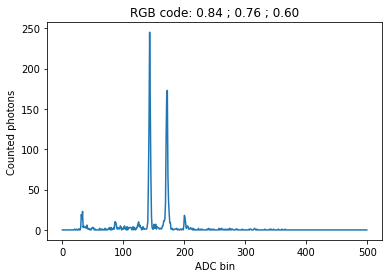

In [8]:
# Let us see how these histograms look like using matplotlib-pyplot
# Pick a random row number
numb_entry_random = np.random.randint(len(hists))
print('From row number ', numb_entry_random)
step0 = hists[numb_entry_random]
print('Len: ', len(step0))
print('Max count: ', np.amax(np.array(step0)))
print('Mean count: ', np.mean(np.array(step0)))
plt.plot( step0 )
plt.xlabel ("ADC bin")
plt.ylabel ("Counted photons")
plt.title (f"RGB code: {rgbs[numb_entry_random][0]:.2f} ; {rgbs[numb_entry_random][1]:.2f} ; {rgbs[numb_entry_random][2]:.2f}")
plt.show()

#### 2.2.1 Training/Test split
Here we define a custom function to split our dataset into test/train.


In [9]:
def prepare_training_dataset(X, y, percentage = 0.8):
    # Shuffle the dataframe
    assert len(X)==len(y), "Inconsistent number of rows in X and y"
    
    N = len(X)
    indices = np.random.permutation (N)
    
    n = int(N*percentage)
    train = indices[:n]
    test = indices[n:]
    
    return X[train], y[train], X[test], y[test]

And then we call it and check the shape of the obtained splits.

In [10]:
X_train, y_train, X_test, y_test = prepare_training_dataset(hists, rgbs, percentage = 0.8)

print('Train elements: ', np.shape(X_train) )
print('Test Elements: ', np.shape(X_test) )

print('Train/test features: ', len(X_train[0]) )
print(f'Shape X_train: {(np.shape(X_train)[0], np.shape(X_train)[1]) }')
print(f'Shape y_train: {(np.shape(y_train)[0], np.shape(y_train)[1]) }')

Train elements:  (20779, 500)
Test Elements:  (5195, 500)
Train/test features:  500
Shape X_train: (20779, 500)
Shape y_train: (20779, 3)


#### 2.2.2 Some statistics
Finally, let's display some statistics on the dataset before going on: 

Let us look at
1. Average RGB color in y_train and the average count per pixel, integrated over the "energy of the photon" in X_train, i.e. sumnming, pixel by pixel, over the ADC channel (which is in 1-to-1 correspondence with an energy "level")
2. the plots of: 
- The distribution of total counts by pixels in X_train;
- The distribution of counts per channel in X_train

Average RGB color: [0.24346734 0.21664916 0.1846423 ]
Average count per pixel (integrated over photon energy): 1666.19 photons


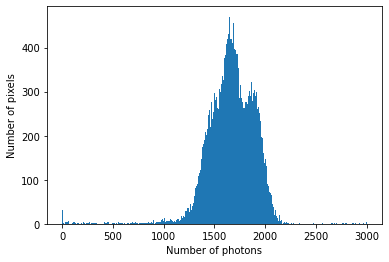

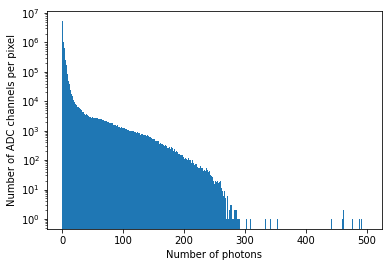

In [11]:
### Average RGB color
print(f'Average RGB color: {y_train.mean(axis=0)}')

### Average Count per pixel
print(f'Average count per pixel (integrated over photon energy): {X_train.sum(axis=1).mean():.2f} photons')


plt.hist (X_train.sum(axis=1), bins=np.linspace(0, 3000, 300))
plt.xlabel ("Number of photons")
plt.ylabel ("Number of pixels")
plt.show()

plt.hist (X_train.flatten(), bins=np.linspace(0, 500, 501))
plt.xlabel ("Number of photons")
plt.ylabel ("Number of ADC channels per pixel")
plt.yscale ('log')
plt.show()

We can also try to represent the whole dataset to highlight common features of the XRF histograms as a function of the pixel considered. We clearly see XRF peaks as vertical bands that change their relative intensity from pixel to pixel.

The horizontal stripes are due to the procedure use to build the dataset.

Text(0, 0.5, 'Pixel ID')

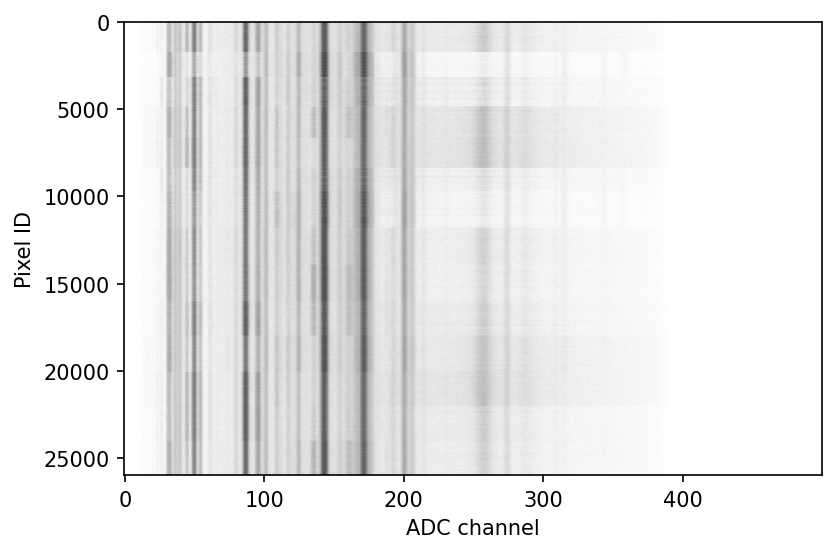

In [12]:
plt.figure (dpi=150)
plt.imshow(np.log(1 + hists), aspect='auto', cmap='binary')
plt.xlabel ("ADC channel")
plt.ylabel ("Pixel ID")

We clearly see that we have two highest peaks, around the channels 140 and 170; those are the $L_\alpha$ and $L_\beta$ lines of Lead (${}^{82}$Pb);

This is clearly expected, since the most common pigment made with lead is the so-called *biacca* (in english, **white lead**); usually, painters prepare the canvas by covering the whole surface with the white paint, creating the *preparatory layer*.


<a href="./Assets/Images/energie_X.pdf"> Link to X-ray energy table.</a> 


## 3. The Deep Neural Network Model

The goal in this section is to employ a Deep Neural Network to *artificially recolor* an XRF image. This is an example of a possible application of Machine Learning to physical technologies. 

This is a case study, which goes in the direction of a *digital restoration* of a painted surface via the application of physical technologies. It could be relevant in case the case, e.g., of submerged paintings, i.e. a pictoric layer hidden "behind" the outermost, visible layer. 

<img src="./Assets/Images/DNN_all_hist.png" alt="Drawing" style="float: center; margin-top: 15px; width: 75%"/>

But, first: what is an Artificial Deep Neural Network?

<img src="./Assets/Images/XKCD_2.png" alt="Drawing" style="float: center; margin-top: 15px; width: 35%"/>

### 3.1. Basics of Artificial Neural Networks

Artificial neural networks (ANN or NN) are computing systems that are inspired by, but not identical to, biological neural networks that constitute animal brains. Such systems learn to perform tasks by considering examples, generally without being programmed with task-specific rules.

A NN is based on a collection of connected units or nodes called artificial neurons, which loosely model the neurons in a biological brain. The basic example is the perceptron [1]. Each connection, like the synapses in a biological brain, can transmit a signal to other neurons. An artificial neuron that receives a signal then processes it and can signal neurons connected to it [2].

<img src="https://upload.wikimedia.org/wikipedia/commons/4/46/Colored_neural_network.svg" alt="Drawing" style="float: center; margin-top: 15px"/>

In ANN implementations, the "signal" at a connection is a real number, and the output of each neuron is computed by some non-linear function of the sum of its inputs. The connections are called edges. Neurons and edges typically have a weight that adjusts as learning proceeds. The weight increases or decreases the strength of the signal at a connection. Neurons may have a threshold such that a signal is sent only if the aggregate signal crosses that threshold. Typically, neurons are aggregated into layers. Different layers may perform different transformations on their inputs. Signals travel from the first layer (the input layer), to the last layer (the output layer), possibly after traversing the layers multiple times. 



<img src="./Assets/Images/Dense.gif" alt="Drawing" style="float: center; margin-top: 15px"/>


Stated differently, Artificial Neural Networks are complex non-linear parametric interpolating functions, which maps the vectorial space (actually, a differential manifod) $\mathcal{M}$ (usually locally isomorphic to $\mathbb{R}^m$ of the *features* vector, into the vectorial space (actually, a differential manifod) $\mathcal{N}$ (usually locally isomorphic to $\mathbb{R}^n$ of the *labels* vector:
$$\mathrm{ANN} : \mathcal{M} \mapsto \mathcal{N}\,, $$
where $\mathrm{ANN}$ is realized as a non-linear function $F$, which depends on a (huge) set of parameters, called *trainable parameters*, $\{\mathbf{a}\}$, 

$$F_{\mathbf{a}} (x) = y \,,$$

where $x \in \mathcal{M}$, $y \in \mathcal{N}$ and, crucially, $F_{\mathbf{a}}$ is a long composition of non-linear functions, called **layers**, $\lambda^{(i)}_{\mathbf{a_i} }$, with $i=0, \ldots, N$, where $N$ denotes the depth of the Neural Network. If $N$ is large, it is a *deep* neural network:

$$F_{\mathbf{a}} = \lambda^{(N)}_{\mathbf{a_N} } \circ \lambda^{(N-1)}_{\mathbf{a_{N-1}} } \circ \cdots \circ \lambda^{(0)}_{\mathbf{a_0} } \, .$$

In this way, the input $x$ is *feed-forward* the composing functions, until the target space. 

The way the compising functions $\lambda^{(i)}_{\mathbf{a_i} }$, or *layers*, are defined and assembled, defines the *architecture* of the Neural Network; In this section and in the following, we will explore two of them: the **dense, multi-layered perceptron**, and the **convolutional neural network**. 

The **training** of the ANN is the procedure by which the set of interpolating paramters $\{\mathbf{a}\}$ is fixed, by minimising a certain error function, called *cost function* $\mathcal{L}$, which computes $\mathcal{L}[F_{\mathbf{a}}(x), y]$, some kind of distance between the predicted output, $F_{\mathbf{a}}(x) = \bar y$, and the actual output, $y$.

Since $F_{\mathbf{a}}$ is a composition, thanks to the chain rule of differential analysis, it is easy to update the parameters warking backwards, from the outer layer to the inner one; this procedure is called *back-propagation*; in the following we will discuss it in more depth. 

<img src="./Assets/Images/XKCD_3.png" alt="Drawing" style="float: center; margin-top: 15px; width: 35%"/>

---------------------------------------------------------------------------
[1] https://en.wikipedia.org/wiki/Perceptron

[2] https://en.wikipedia.org/wiki/Artificial_neural_network

[3] https://www.saedsayad.com/artificial_neural_network_bkp.htm

[4] https://iamtrask.github.io/2015/07/12/basic-python-network/

[5] https://www.freecodecamp.org/news/building-a-neural-network-from-scratch/

[6] https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6

### 3.2 Perceptron

The perceptron is a basic function that mimics the human neuron. It receives $n$ inputs, associated to the dendrites inputs to the neuron. Each dendrite, due to *lernging*, is weighted by a number that signals its input relevance for the neuron [1]. 

<img src="https://upload.wikimedia.org/wikipedia/commons/a/a9/Complete_neuron_cell_diagram_en.svg" alt="Drawing" style="float: center; margin-top: 15px"/>

The signal is thus elaborated and passed through the *axon* to others neurons [2]; actually, the neurons *fires* the signal only if the elaborated inputs have surpassed a certain threshold; this is a spiking neuron [3].

The perceptron wants to mimic it. Receinving a vector (i.e. array) $x_i$ of signals, where $i$ stands for the $i$-th dendrites, it weights each of them by a vector of weights $W_i$. It adds also a *bias* to remove near-zero issues (the bias shifts the decision boundary away from the origin and does not depend on any input value), i.e.
$$x_i \mapsto W_i{}^j x_j + b_i$$

Also, the perceptron ignite an output through an activation function that is usually a *sigmoid* function [4]
$$ \varphi (x) = \frac{1}{1+e^{-x}} \,,$$
or a *Rectified Linear Unit* (ReLU)
$$\varphi(x) = \mathrm{max}[0, x] \,,$$

<div style="margin-top: 3em; margin-bottom: 30em; width:100%">
    <img src="https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg"  alt="Drawing" style="float: left; width: 50%; height: 300px"/>
    <img src="https://upload.wikimedia.org/wikipedia/commons/6/6c/Rectifier_and_softplus_functions.svg"  alt="Drawing" style="float: right; width: 50%; height: 300px"/>  
</div>


so that the output $O(x_i)$ of the perceptron is given by

$$O (x_i) = \varphi \left( \Sigma_{i=1}^{n} W_i{}^j \, x_j + b_i   \right) ,$$

or, in vectorial representation 

$$O(x) = \varphi \left(\mathbf{W}^T \cdot \mathbf{x} + b   \right) $$

<img src="./Assets/Images/Perceptron.gif" alt="Drawing" style="float: center; margin-top: 15px"/>

-----
[1] https://en.wikipedia.org/wiki/Dendrite

[2] https://en.wikipedia.org/wiki/Neuron

[3] https://icwww.epfl.ch/~gerstner/BUCH.html

[4] https://en.wikipedia.org/wiki/Rectifier_(neural_networks)

### 3.3. Multilayer perceptrons: the Dense Layer

A standard Artificial Neural Network will be made of multiple layers:
1. An **Input Layer**, that pass the features to the NN
2. An arbitrary number of **Hidden Layers**, containing an arbitrary number of neurons for each layer, that receives the inputs and elaborate them. We will introduce Hidden Layers with ReLU activator, since in the *hidden* part of the NN we don't need the output to be contained in the $[0,1]$ range. 
3. An **Output Layer**: these layers contains a number of neurons equal to the number of possible labels we want to have a prediction to (so, in our case, 3: R, G, B); usually, this is because the output of the NN is thus a vector whose dimension is the same as the cardinality of the set of labels, and its entries are the *probability* for each label for the element whose feateures we have passed to the NN. So, a specific activation function is usually employed, dubbed *softmax* (see https://keras.io/api/layers/activations/), which is a function which converts a real vector to a vector of categorical probabilities so that the elements of the output vector are in range $[0, 1]$ and sum to $1$.

Instead, we will use a sigmoid activator to the Output layer, so we squeeze each perceptron's output between 0 and 1, without imposing any relation among the R,G,B labels of the final output.

<img src="./Assets/Images/Dense.gif" alt="Drawing" style="float: center; margin-top: 15px"/>

A (hidden) layer is made by $p$ perceptrons in parrallel, each of which receives the same input (that is the output of the previous layer). The layer will have $p$ perceptrons, labelled by $a=1,\ldots ,p$. Thus the output of the whole layer is a matrix ${O}^{(a)}$ given by
$$O^{(a)} (x_i) = \varphi \left( {}^{(a)}W_i{}^j \, x_j + {}^{(a)}b_i   \right) ,$$

If we start having multiple layers, let us say $N$, we have an additional label $A=1, \ldots, N$ so that 

$$ O^{(a_A)} (x_i) = \varphi_{(A)} \left( {}^{(a_A)} W_i{}^j \, x_j + {}^{(a_A)} b_i   \right) ,$$

where we have inserted the label also to the activation function that may depend on which layer we are considering!

In the notation introduced at the beginning of §3.1, we may read the Artificial Neural Network of $N$ of the above layers as

$$F_{\mathbf{a}} =  O^{(a_N)} \circ  O^{(a_{N-1})} \circ \cdots \circ  O^{(a_0)} \,.  $$

### 3.3.1. The *Keras* Dense Layer
In Keras, a Dense layer is implemented by calling the *Dense* class: 
```
tf.keras.layers.Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)
```


See https://keras.io/api/layers/core_layers/dense/

Example: 
```
>>> # Create a `Sequential` model and add a Dense layer as the first layer.  
>>> model = tf.keras.models.Sequential()
>>> model.add(tf.keras.Input(shape=(16,)))
>>> model.add(tf.keras.layers.Dense(32, activation='relu'))
>>> # Now the model will take as input arrays of shape (None, 16)  
>>> # and output arrays of shape (None, 32).  
>>> # Note that after the first layer, you don't need to specify  
>>> # the size of the input anymore:  
>>> model.add(tf.keras.layers.Dense(32))
>>> model.output_shape
(None, 32)
```

### 3.4. Training: Backpropagation and Gradient descent [extra]

For adjusting the trainable parameters $\{W\}$ and $\{b\}$ during the training process, we need to implement the *backpropagation* algorithm. We want to minimize a certain **cost function**, e.g.
$$\mathcal{L}(y,\bar{y})=|y-\bar{y}|^2\,,$$
where $y$ is the output of the output layer while $\bar{y}$ is the actual label; in order to do so, we start the *gradient descent*, which means that we see the cost function as a function of the trainable parameters $\mathbf{W}$ such as $\{W\}$ and $\{b\}$, we compute the gradient - gradient that can be seen as the slope of the multidimensional graph [3] - and we subtract it from the randomly initialized set, as
$$\mathbf{W}'_n =  \mathbf{W}_n - \eta \nabla \mathcal{L}(\mathbf{W}_n)  \,,$$
moving thus towards the *optima*, or global minimum, of the cost function. In the formula above $\eta$ is the **learning rate** of the ANN [4] 


This is pictorially represented in the following gif [5]:

<img src="./Assets/Images/gradient_descent.gif" alt="Drawing" style="float: center; margin-top: 15px"/>

Explicitly, the $\alpha$-th hidden layer is defined by a *matrix* $W_{\alpha}^{i_{\alpha} i_{\alpha-1}}$ and a vector $b_\alpha^{i_\alpha}$, and its output is
$$z_\alpha^{i_\alpha} = \varphi ( W_{\alpha}^{i_{\alpha} i_{\alpha-1}} \, z^{i_{\alpha-1}}_{\alpha-1} + b_\alpha^{i_\alpha} ) \equiv \varphi (\zeta^{i_\alpha}_\alpha)  .$$

Notice that we have used the greek letter to define the value of the output before employing the activation function, i.e. the greek letters refer to the output of the *soma*, while the latin letter are the output of the *axon*. 

**NB:** Notice that the activation function is crucial in order to make the DNN a *non-linear* interpolating function.

We need thus to compute the gradient $\nabla \mathcal{L}$, where each element is $\partial \mathcal{L} / \partial z_\alpha^{i_\alpha}$; by applying the chain rule repeatedly we get 
$$ \frac{\partial \mathcal{L}}{\partial z_{\alpha}^{i_\alpha}} = \frac{\partial \mathcal{L}}{\partial z_{\alpha+1}^{i_{\alpha+1}} } \cdot \frac{\partial z_{\alpha+1}^{i_{\alpha+1}} }{\partial z_{\alpha}^{i_\alpha}} = \frac{\partial \mathcal{L}}{\partial z_{\alpha+1}^{i_{\alpha+1}} } \cdot W_{\alpha}^{i_{\alpha+1} i_\alpha} \varphi' (z_{\alpha}^{i_\alpha}) \,.$$

Define **the error** for the $\alpha$-th layer as 
$$\delta_\alpha^{i_\alpha} = \frac{\partial \mathcal{L}}{\partial z_{\alpha}^{i_\alpha}}$$
we see that, working *backwards*, we may obtain it from the previously computed $(\alpha+1)$-th error via [6]
$$\delta_{\alpha}^{i_\alpha}  = {\large \Sigma}_{{i_\alpha}}  \delta_{\alpha+1}^{i_\alpha+1}  \, W_{\alpha}^{i_{\alpha+1} i_\alpha} \, \varphi' (z_{\alpha}^{i_\alpha}) \,.$$

This means that working iteratively, starting from the Output layer, we may easly compute the errors. 

Now, the goal of this whole procedure is to go towards a global minimum (or *optima*) of $\mathcal{L}$, seen as a function of the parametes $W_\alpha^{i_{\alpha+1} i_\alpha}$ and $b_\alpha^{i_{\alpha}}$; 

So, after having shifted the parameters as dictated by our gradient descent equation, we need to compute the variation of the cost function under the variation of parameters, to see if we have moved toward a decreasing cost-function path; in order to do so, we apply again the chain rule
$$\frac{\partial \mathcal{L}}{\partial W_\alpha^{i_{\alpha+1} i_\alpha} } = \frac{\partial \mathcal{L}}{\partial z_{\alpha}^{i_\alpha}}  \cdot \frac{\partial z_\alpha^{i_\alpha} }{\partial W_\alpha^{i_{\alpha+1} i_\alpha} }  = \delta_\alpha^{i_\alpha} \cdot z_{\alpha-1}^{i_\alpha-1} \varphi'(\zeta_\alpha^{i_\alpha} ) ,$$

$$\frac{\partial \mathcal{L}}{\partial b_\alpha^{i_{\alpha}} } =  \frac{\partial \mathcal{L}}{\partial z_{\alpha}^{i_\alpha}}  \cdot \frac{\partial z_\alpha^{i_\alpha} }{\partial b_\alpha^{i_{\alpha}} } =  \delta_\alpha^{i_\alpha} \cdot  \varphi'(\zeta_\alpha^{i_\alpha} ) . $$

<img src="./Assets/Images/training_back.gif" alt="Drawing" style="float: center; margin-top: 30px; margin-bottom: 2em; width: 60%"/>


#### 3.4.1. The algorithm
We now recap what we have shown: 
* **Input**: Set up the inputs $z_0^{i_0}$;
* **Feed Forward**: Computes the output of the $\alpha$-th layer $z_\alpha^{i_\alpha}$ via the formula 
$$z_\alpha^{i_\alpha} = \varphi ( W_{\alpha}^{i_{\alpha} i_{\alpha-1}} \, z^{i_{\alpha-1}}_{\alpha-1} + b_\alpha^{i_\alpha} ) \equiv \varphi (\zeta^{i_\alpha}_\alpha) ,$$
up to the output layer.
* **Compute the errors**: compute the error of the last layer via the formula 
$$\delta^N_{i_N} = \frac{\partial \mathcal{L}}{\partial z_N^{i_N} } \,.$$

*  **Backpropagate the Error**: For each layer $\alpha= N-1, \ldots, 2$ compute 
$$\delta_{\alpha}^{i_\alpha}  = {\large \Sigma}_{{i_\alpha}}  \delta_{\alpha+1}^{i_\alpha+1}  \, W_{\alpha}^{i_{\alpha+1} i_\alpha} \, \varphi' (z_{\alpha}^{i_\alpha}) \,.$$
* **Output**: the gradient of the cost function is now computed by the formulae
$$\frac{\partial \mathcal{L}}{\partial W_\alpha^{i_{\alpha+1} i_\alpha} } = \delta_\alpha^{i_\alpha} \cdot z_{\alpha-1}^{i_\alpha-1} \varphi'(\zeta_\alpha^{i_\alpha} ) ,$$
$$\frac{\partial \mathcal{L}}{\partial b_\alpha^{i_{\alpha}} } =  \delta_\alpha^{i_\alpha} \cdot  \varphi'(\zeta_\alpha^{i_\alpha} ) . $$

So the Deep Neural Network is an algorithm that will perform the previous task in the followin manner: 
1. **Input a set of training examples** or *batches*.
2. **For each training batch** $x_{i_0}$: set the corresponding input activation $z_1^{i_1} = \varphi(W_1^{i_1 i_0} x_{i_0} + b_1^{i_1})$, and then perform the following steps: 
    1. **Feedforward**: $\forall \alpha=2,\ldots N$ compute 
    $$z_\alpha^{i_\alpha} = \varphi ( W_{\alpha}^{i_{\alpha} i_{\alpha-1}} \, z^{i_{\alpha-1}}_{\alpha-1} + b_\alpha^{i_\alpha} ) \equiv \varphi (\zeta^{i_\alpha}_\alpha) ,$$
    $$y = f( W_{Out}^{i_n} z_n^{i_n} + b_{Out} ) $$
    2. **Compute the outer layer Error**: Compute the vector
    $$\delta^{Out} = \frac{\partial \mathcal{L}}{\partial z_{Out} } \cdot f' (z_{Out}) .$$
    3. **Backpropagate the error**: for each $\alpha = N, N-1, \ldots 2$ compute 
    $$\delta_{\alpha}^{i_\alpha}  = {\large \Sigma}_{{i_\alpha}}  \delta_{\alpha+1}^{i_\alpha+1}  \, W_{\alpha}^{i_{\alpha+1} i_\alpha} \, \varphi' (z_{\alpha}^{i_\alpha}) \,.$$
3. **Gradient Descent**: for each $\alpha = N, N-1, \ldots 2$ update the weights $\{ W_\alpha^{i_\alpha i_{\alpha-1} } \,, b_\alpha^{i_\alpha} \}$ via the rule
$$W_\alpha^{i_\alpha i_{\alpha-1} } \mapsto W_\alpha^{i_\alpha i_{\alpha-1} } - \eta {\large \Sigma}_{i_\alpha} \delta_\alpha^{i_\alpha} \cdot z_{\alpha-1}^{i_{\alpha-1}} \,,$$
$$b_\alpha^{i_\alpha  } \mapsto b_\alpha^{i_\alpha  } - \eta {\large \Sigma}_{i_\alpha} \delta_\alpha^{i_\alpha} \,.$$

<img src="./Assets/Images/Grad_desc.gif" alt="Drawing" style="float: center; margin-top: 15px; margin-bottom: 5em; width: 49%"/>

-------
[1] http://cs231n.github.io/neural-networks-1/

[2] https://machinelearningmastery.com/implement-backpropagation-algorithm-scratch-python/

[3] https://www.nature.com/articles/323533a0 (original paper) https://en.wikipedia.org/wiki/Gradient_descent (Wiki article)

[4] https://en.wikipedia.org/wiki/Stochastic_gradient_descent

[5] https://hackernoon.com/gradient-descent-aynk-7cbe95a778da

[6] http://neuralnetworksanddeeplearning.com/chap2.html

[7] https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/

My simple notebook on how to implement a DNN from scratch:
https://www.kaggle.com/androbomb/simple-nn-with-python-multi-layer-perceptron

A very nice set of introductory youtube lectures with amazing gifs (that I used): https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw


### 3.5: Coding the Deep Neural Network

We will build now a simple network wich employs Dense layers to interpret histograms of XRF counts and returning an RGB vector

<img src="./Assets/Images/DNN_single_hist.png" alt="Drawing" style="float: center; margin-top: 15px; width: 75%"/>

#### 3.5.1. Defining the model

Here we define a simple, three-layer deep neural network using Tensorflow and Keras:

https://www.tensorflow.org/

https://keras.io/

In [13]:
#######################################################################################################################
# Import relevant Keras classes

# Input layer 
from keras.layers import InputLayer, Input
# The Dense Layer
from keras.layers import Dense

# Sequential class for instantiating the Model
from keras.models import Sequential
from keras import Model # If we want to use the Keras API

# To get the Activation functions
from keras.layers import Activation


#######################################################################################################################
# Input-Output defs

input_shape = np.shape(X_train)[1]   # Input layer takes [number of vectors, size of vectors, features-per-vector] = [#size_dataset, 1000, 1]
num_classes = 3 # RGB

CHANNEL_DEPTH = 500   # Each histograms has 500 channels
num_sensors = 1       # We have only 1 histogram per data

#######################################################################################################################
# Defining the model
#######################################################################################################################

# Instantiate it
model_m = Sequential()

#############
# input
model_m.add(Input(shape=(input_shape, )))

#############
# Hidden Layers

# 1°
model_m.add(Dense(250, 
                 activation='relu'))
# 2°
model_m.add(Dense(120, 
                 activation='relu'))
# 3° 
model_m.add(Dense(60, 
                 activation='relu'))

# Output layer
model_m.add(Dense(num_classes, activation='sigmoid'))

###########
# Summary
print(model_m.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 250)               125250    
                                                                 
 dense_1 (Dense)             (None, 120)               30120     
                                                                 
 dense_2 (Dense)             (None, 60)                7260      
                                                                 
 dense_3 (Dense)             (None, 3)                 183       
                                                                 
Total params: 162,813
Trainable params: 162,813
Non-trainable params: 0
_________________________________________________________________
None


2021-12-06 15:53:15.594615: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


We use now graphviz ( https://graphviz.org/ ) to graphically illustrate the model we have defined: 

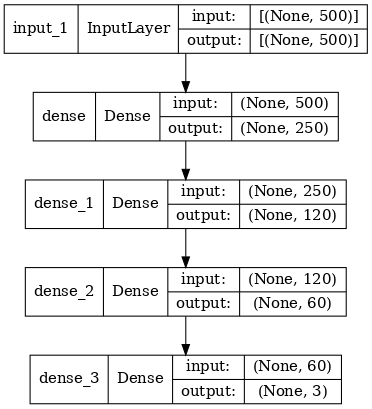

In [19]:
import tensorflow as tf
tf.keras.utils.plot_model(model_m, show_shapes=True, dpi=76, to_file="dense_lecture.png")

#### 3.5.2. Training the model

We have to define the function computing the loss. 

Usually, a *Mean Squared Error* function is employed (the one shown before as example):
$$\mathcal{L}(y,\bar{y})=|y-\bar{y}|^2\,.$$

Here instead, we use the *binary cross-entropy* function (https://keras.io/api/losses/probabilistic_losses/#binarycrossentropy-class ; for other loss functions, see https://keras.io/api/losses/); it is defined via
$$\mathcal{L}(y,\bar{y})= - \sum_{i=R,G,B} y_i \log \bar{y}_i  \,.$$

This is useful for us, since $\mathcal{L} \in [0,1]$. 

Also, we will have to fix the *batch size* and the number of *epochs* for the training. 

**Batch size**:

The batch size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters. Think of a batch as a for-loop iterating over one or more samples and making predictions. At the end of the batch, the predictions are compared to the expected output variables and an error is calculated. From this error, the update algorithm is used to improve the model, e.g. move down along the error gradient. [1]

Usually, a set of names for the descent algorithm is employed, in relation to the batch size:

- Batch Gradient Descent. Batch Size = Size of Training Set
- Stochastic Gradient Descent. Batch Size = 1
- Mini-Batch Gradient Descent. 1 < Batch Size < Size of Training Set

**Epochs**:

The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset. One epoch means that each sample in the training dataset has had an opportunity to update the internal model parameters. An epoch is comprised of one or more batches.


Keras also allows us to use some callbacks while training, which will not use them now. (see https://keras.io/api/callbacks/)

##### 3.5.2.1: Optimazer: ADAM Algorithm  [EXTRA]

Here we instantiate the model; we will use the ADAM optimizer [2]; The Adam optimization algorithm is an extension to stochastic gradient descen; the latter  maintains a single learning rate for all weight updates and the learning rate does not change during training; In ADAM, instead, A learning rate is maintained for each network weight (parameter) and separately adapted as learning unfolds.

**ADAM Algorithm**

Adam, is an algorithm for stochastic optimization. $g_t^2$ indicates the elementwise square $g_t \otimes g_t$. Good default settings for the tested machine learning problems are $\alpha=0.001$, $\beta_1=0.9$, $β_2=0.999$ and $\epsilon=10^{−8}$. All operations on vectors are element-wise. The pseudo-code implementation of the ADAM algorithm is the following: 


**Require**: $\alpha$: Stepsize

**Require**: $\beta_1, \beta_2 \in [0,1)$: Exponential decay rates for the moment estimates

**Require**: $f(\theta)$: Stochastic objective function with parameters $\theta$

**Require**: $\theta_0$: Initial parameter vector

- $m_0 \leftarrow 0$ (Initialize 1st moment vector)
- $v_0 \leftarrow 0$ (Initialize 2nd moment vector)
- $t \leftarrow 0$ (Initialize timestep)

**while** $\theta_t$ not converged **do**
- $t \leftarrow t + 1$   
- $g_t \leftarrow ∇_\theta f_t(\theta_{t−1})$ (Get gradients w.r.t. stochastic objective at timestep t)   
- $m_t \leftarrow \beta_1 \cdot m_{t − 1} + (1 − \beta_1) \cdot g_t$ (Update biased first moment estimate)
- $v_t \leftarrow \beta_2 \cdot v_{t − 1} + (1 − \beta_2) \cdot g_t^2$ (Update biased second raw moment estimate)
- $\hat{m}_t \leftarrow m_t/(1 − \beta_t^2)$ (Compute bias-corrected first moment estimate)
- $\hat{v}_t \leftarrow v_t/(1 − \beta_t^2)$ (Compute bias-corrected second raw moment estimate)   
- $\theta_t \leftarrow \theta_{t − 1} − \alpha \cdot \hat{m}_t/(\sqrt{\hat{v}_t} + \epsilon)$ (Update parameters)

    
&nbsp;&nbsp;&nbsp;&nbsp; **end while** return $\theta_t$ (Resulting parameters)


--------
[1] https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/

[2] https://arxiv.org/abs/1412.6980

In [20]:
############################
# Training - prerequisites
loss_used = 'binary_crossentropy'

model_m.compile(loss=loss_used,
                 optimizer='adam',
                 )
# We need to pick the size of the batch used for the training
BATCH_SIZE = 200 
# And the number of epochs on which we train the dataset
EPOCHS = 20 

In [21]:
import datetime
starting_time = datetime.datetime.now() 

print('\nStart training model: \n')

##########################################################
# TRAINING

history = model_m.fit(X_train,
                       y_train,
                       batch_size=BATCH_SIZE,
                       epochs=EPOCHS,
                       #callbacks=callbacks_list,
                       validation_data=(X_test, y_test),
                       verbose=1)

print('\n\nTraining done...\n')

now = datetime.datetime.now()
total_training_time = now-starting_time
print('Total training time: ', total_training_time)


Start training model: 

Epoch 1/20
104/104 [==============================] - 2s 10ms/step - loss: 0.7728 - val_loss: 0.4958
Epoch 2/20
104/104 [==============================] - 1s 7ms/step - loss: 0.4858 - val_loss: 0.4882
Epoch 3/20
104/104 [==============================] - 1s 7ms/step - loss: 0.4794 - val_loss: 0.4831
Epoch 4/20
104/104 [==============================] - 1s 8ms/step - loss: 0.4752 - val_loss: 0.4800
Epoch 5/20
104/104 [==============================] - 1s 7ms/step - loss: 0.4717 - val_loss: 0.4817
Epoch 6/20
104/104 [==============================] - 1s 8ms/step - loss: 0.4694 - val_loss: 0.4767
Epoch 7/20
104/104 [==============================] - 1s 7ms/step - loss: 0.4688 - val_loss: 0.4847
Epoch 8/20
104/104 [==============================] - 1s 8ms/step - loss: 0.4683 - val_loss: 0.4762
Epoch 9/20
104/104 [==============================] - 1s 8ms/step - loss: 0.4657 - val_loss: 0.4764
Epoch 10/20
104/104 [==============================] - 1s 7ms/step - loss:

#### 3.5.3. Plot the training history and save the model

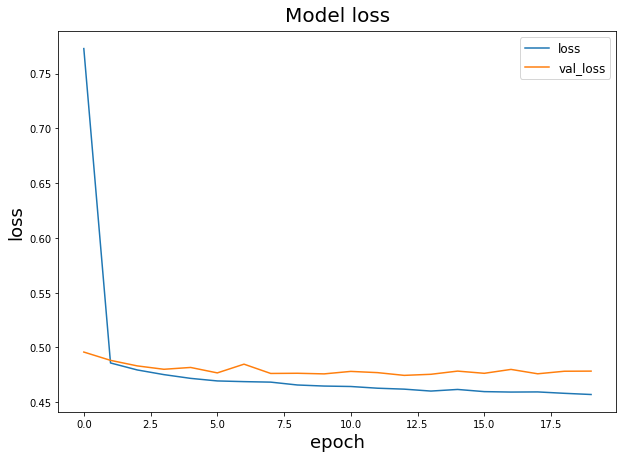

In [23]:
# summarize history for loss
plt.figure(figsize=(10, 7))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss', fontsize=20,  pad=10)

plt.ylabel('loss', fontsize=18)
plt.xlabel('epoch', fontsize=18)

plt.legend(['loss', 'val_loss'], loc='upper right', fontsize=12)

plt.show()

#### 3.5.4 Saving the model

We save the model to both HDF and JSON. 
The former is a compact data format which encapsulate both the architecture and the weights of the dataset, while the latter is text-based, human-readable data format and is often used to describe the architecture only. 


In [24]:
##########################################################
# SAVING

# serialize weights to HDF5
time_string = now.strftime("%Y-%m-%d-%H-%M-%S")    
name_to_save = 'model_Dense_w_batchsize' + str(BATCH_SIZE) + '_epochs' + str(EPOCHS) +  '_v' + time_string 
path_to_model = 'Model_data/' +  name_to_save + '.h5'
model_m.save(path_to_model)
print("Saved model to disk")

Saved model to disk


### 3.6. Predictions of the Model

In [25]:
prediction = model_m.predict(X_test)

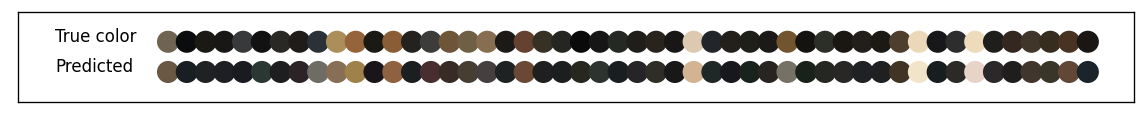

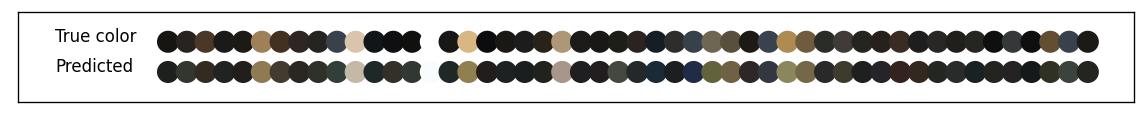

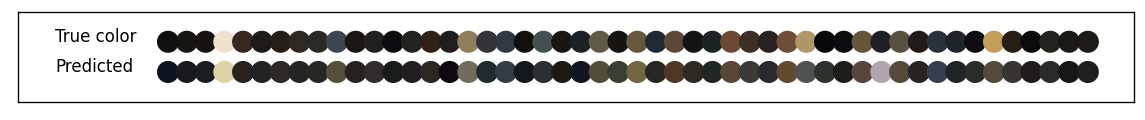

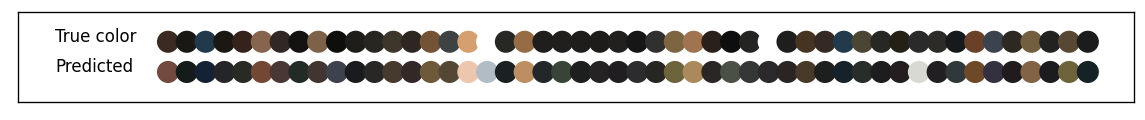

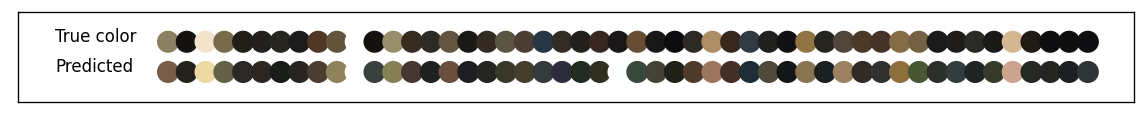

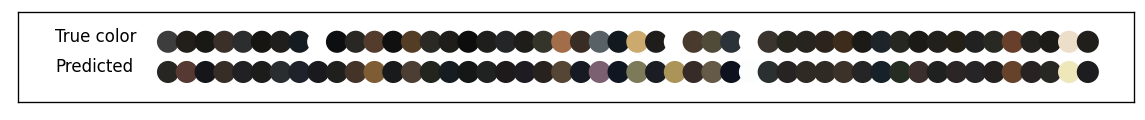

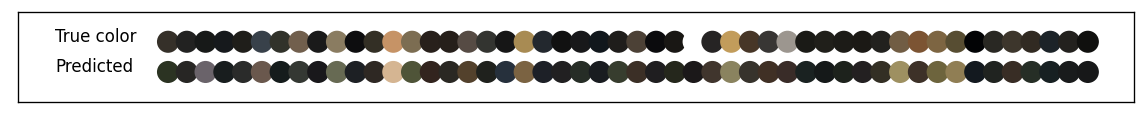

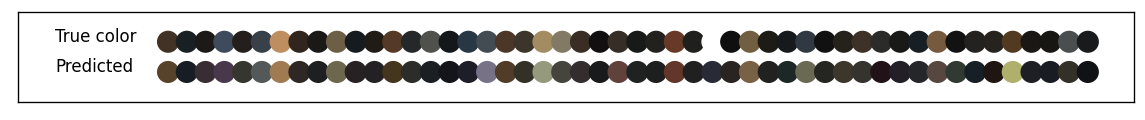

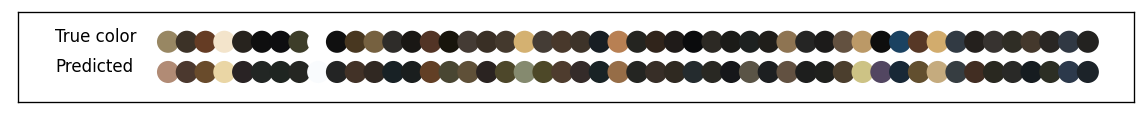

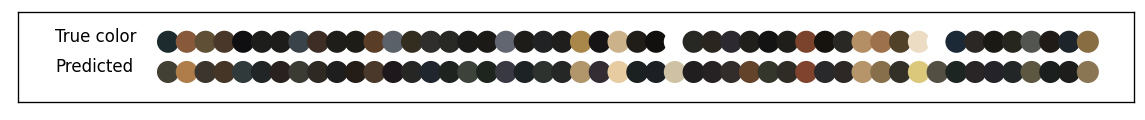

In [26]:
for iFirst in range(0, 500, 50):
    plt.figure(figsize=(12,1), dpi = 120)
    plt.scatter (np.arange(50), np.ones(50), c=y_test[iFirst:iFirst+50], s=150)
    plt.scatter (np.arange(50), np.zeros(50), c=prediction[iFirst:iFirst+50], s=150)
    plt.xlim (-8, None)
    plt.ylim (-1, 2)
    plt.xticks ([])
    plt.yticks ([])

    

    plt.text (-6, 1, "True color")
    plt.text (-6, 0, "Predicted")
    plt.show()


<img src="./Rawdata+RGB/putto_VISscalato.png" alt="Drawing" style="float: left; margin-bottom: 18em; width: 25%"/>
<img src="./Rawdata+RGB/ragtriste_VISscalato.png" alt="Drawing" style="float: right;  margin-bottom: 4em; width: 25%"/>

### 3.7. Apply the saved model to the Raw Data

In [27]:
filename = "Rawdata+RGB/Putto_Area1_fiori"

if not os.path.isfile(filename+".npz"):
    try:
        # wget
        !wget -O {filename}.npz https://pandora.infn.it/public/141790/dl/Putto_Area1_fiori.npz
    except:
        !wget  https://pandora.infn.it/public/141790/dl/Putto_Area1_fiori.npz
        filename = filename.split('/')[-1]

Shape of the loaded XRF image: (255, 141, 500)
Shape of the loaded RGB image (true): (258, 141, 3)


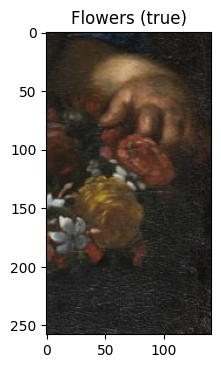

In [28]:
import PIL

xrf_img = np.load(f"{filename}.npz")['img']
print (f"Shape of the loaded XRF image: {xrf_img.shape}")
true_img = np.asarray(PIL.Image.open(f"{filename}.jpg"))
print (f"Shape of the loaded RGB image (true): {true_img.shape}")

plt.figure(dpi=100)
plt.title ("Flowers (true)")
plt.imshow (true_img)
plt.show()

In [29]:
pixels = xrf_img.reshape ((-1, 500))
rgb_pred = model_m.predict (pixels).reshape (xrf_img[:,:,:3].shape)

#### 3.7.1. Show recoloring results

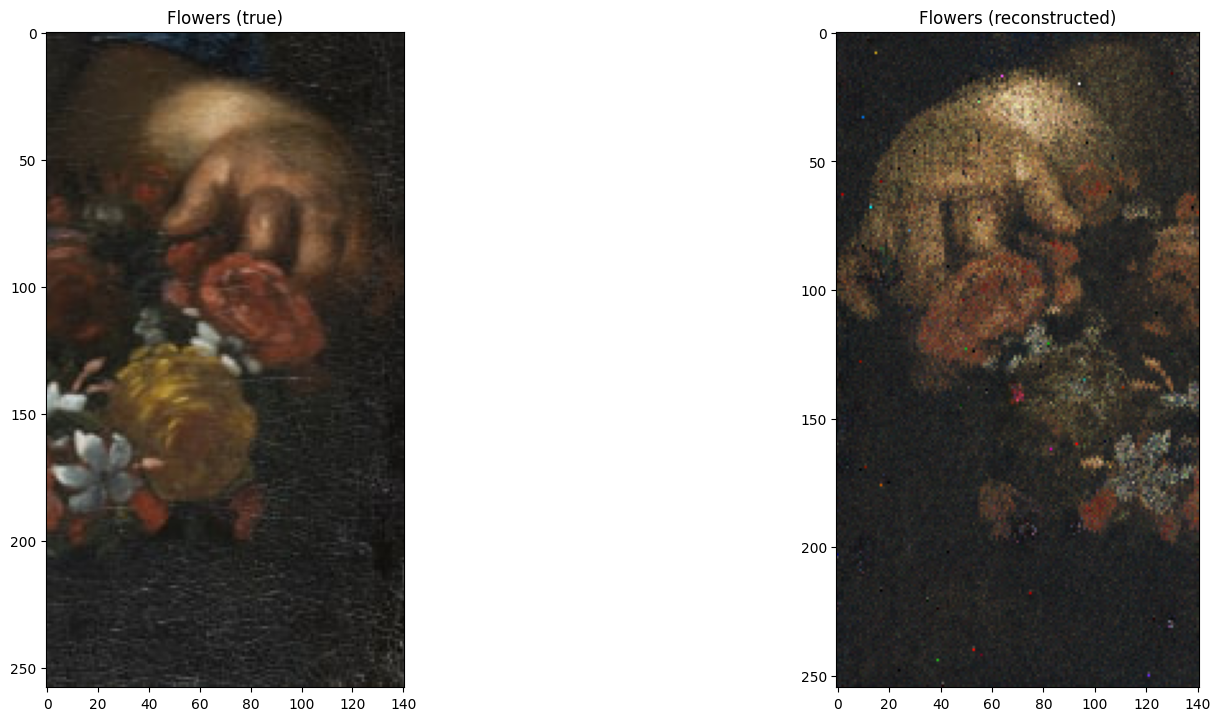

In [30]:
plt.figure(figsize=(16,16), dpi=100)
plt.subplot(221)
plt.title ("Flowers (true)")
plt.imshow (true_img)
plt.subplot(222)
plt.title ("Flowers (reconstructed)")
plt.imshow (rgb_pred)

plt.tight_layout()
# Make space for title
plt.subplots_adjust(top=0.85)
plt.show()

In [31]:
recolored_image = rgb_pred[:,::-1]

### 3.8 DNN: conclusion

In this section we have seen how a Deep Neural Network works and how to implement it in Keras, and we applied it to an XRF raw data. 

Let us compute few errors on the recoloring procedure:

In [32]:
# this function computes the mean squared error and root mean squared error between two images 
def distance_in_RGB(pred, test):
    import math
    if (pred.shape == test.shape):
        distance_tot =  np.sqrt( np.square(pred - test).mean() ) 
        
        # Now we compute color by color
        distance_col = []
        for col in range(0, 3):
            pred_col = pred[:, :, col] # pick only the color channel matrix
            test_col = test[:, :, col] # pick only the color channel matrix
            
            distance_col.append( np.sqrt( np.square(pred_col - test_col).mean() ) )
                        
        print(f'Root Mean squared error: {distance_tot}\n')    
        print(f'Root Mean squared error by color: {distance_col}\n')
        
        print(f'In 255 scale: \n')
        print(f'Root Mean squared error: {math.floor(distance_tot*255)}\n')    
        print(f'Root Mean squared error by color: { np.floor( np.array(distance_col)*255 ) }\n')
        
        return distance_tot, np.array(distance_col)
    else: 
        print('something wrong')
        return -1, np.array([-1, -1, -1])
        
# Now compute the Cross entropy
def compute_cross_entropy(pred, test, epsilon=1e-12):
    """
    Computes cross entropy between targets (encoded as one-hot vectors)
    and predictions. 
    Input: predictions (N, k, 3) ndarray
           targets (N, k, 3) ndarray        
    Returns: scalar
    """
    if (pred.shape == test.shape):
        # We clips the values to avoid numerical errors
        predictions = np.clip(pred, epsilon, 1. - epsilon)
        divisor = np.prod(predictions.shape)
        ce = - np.sum( test * np.log(predictions) ) / divisor
    
        print(f'Binary cross entropy: {ce}\n')    
        return ce
    else: 
        print('something wrong')
        return -1

In [33]:
print('Original Images: ')
print( np.array(true_img).shape)
print(np.array(np.flip(recolored_image, axis=1)).shape)

print('\n\nResized:')
print( np.array(true_img)[0:255, : , :].shape)
print(np.array(np.flip(recolored_image, axis=1)).shape)

Original Images: 
(258, 141, 3)
(255, 141, 3)


Resized:
(255, 141, 3)
(255, 141, 3)


In [34]:
total_distance_error, RGB_error = distance_in_RGB(
    np.flip(recolored_image, axis=1), 
    np.array(true_img)[0:255, : , :]/255   # The two images are not exactly the same size, so we drop the extra lines we have
)

returned_ce = compute_cross_entropy(
    np.flip(recolored_image, axis=1), 
    np.array(true_img)[0:255, : , :]/255   # The two images are not exactly the same size, so we drop the extra lines we have
)

Root Mean squared error: 0.11877813617942459

Root Mean squared error by color: [0.14778960507323222, 0.11348086356485321, 0.08720701313338865]

In 255 scale: 

Root Mean squared error: 30

Root Mean squared error by color: [37. 28. 22.]

Binary cross entropy: 0.31866146426429853



In [35]:
def show_computed_pixel_vs_true_pixel(predicted_pixel, test_pixel):
    fig, (ax1, ax2) = plt.subplots(1,2)

    fig.suptitle('Reconstructed Pixel vs True Pixel', fontsize=20)
    
    # Predicted pixel pixel
    pred = np.array(predicted_pixel)
    ax1.set_title('Reconstructed Pixel', fontsize=14)
    ax1.set_xlabel(str(np.around(pred, 3) ), fontsize=12)
    # Display image, `aspect='auto'` makes it fill the whole `axes` (ax3)
    ax1.imshow(
        [[ pred ]], 
        aspect='auto')
    
    # True pixel
    ax2.set_title('True Pixel', fontsize=14)
    ax2.set_xlabel(str(np.around(np.array(test_pixel), 3 ) ), fontsize=12)
    # Display image, `aspect='auto'` makes it fill the whole `axes` (ax3)
    ax2.imshow(
        [[test_pixel]], 
         aspect='auto')
    
    plt.tight_layout()
    # Make space for title
    plt.subplots_adjust(top=0.85)
    plt.show()

Random pixel: [0.95294118 0.8627451  0.79215686]
Subtracting:


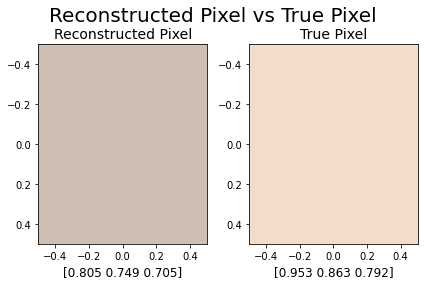

In [36]:
# Generate random RGB pixel
original_test = np.random.randint(0, 255, size=3)/255
print(f'Random pixel: {original_test}')

# Shift it
shifted_test = np.clip(original_test - RGB_error, 0, 1.)

# Show them
print('Subtracting:')
show_computed_pixel_vs_true_pixel(shifted_test, original_test)


The result is quite intriguing, even though clearly unsatisfactory. But, it is quite remarkable that such an easy, non-deep network is still able to *recolor* an XRF image!

Let us move to a more complicated Neural Network architecture, that could help us in this task. 

## 4. (1D) Convolutional Neural Networks

A possible way to generalize the Deep Neural Network based on Dense, multi-perceptron layers, is to employ different kinds of layers, each of which represents different operations on the inputs. 

A **Convolutional Neural Network (CNN)** consists of an input and an output layer, as well as multiple hidden layers, as the DNN; but, in contrast with the DNN, the hidden layers of a CNN typically consist of a series of **Convolutional layers**, that are employed to learn the spatial correlation within the inputs by convolving them via a multiplication with a certain *kernel* operator, and whose behaviour we shall briefly describe in the following, and **Pooling layers**, whose goal is to reduce the size of the dataset, maintaining the relevant informations there encoded. 

The activation function is commonly a *REctified Linear Unit (RELU) layer*, and, in classification tasks, Convolution/Pooling layers are subsequently followed by additional **fully connected layers** [1];

<img src="./Assets/Images/CNN_arch_example.jpeg" alt="Drawing" style="float: center; width: 90%"/>

To recap, a CNN (usually) consists of
1. Convolutional Layers
2. Pooling Layers
3. Fully Connected Layers

<img src="./Assets/Video/CNN_example.gif" alt="Drawing" style="float: center; width: 75%"/>


### 4.1. Convolution Layer

A convolutional layer is a layer which applies a *convolution* to the input data [2]; it can be seen as a non-linear operator $\mathbf{K}$ which maps a vector belonging to a vector space $\mathbb{R}^m$ to a tensor belonging in a subspace of the cartesian product $\bigotimes_{a=1}^{\# \mathrm{filters}} \mathbb{R}^m$, i.e.

$$\mathbf{K} :  \mathbb{R}^m \mapsto \bigotimes_{a=1}^{\# \mathrm{filters}} \mathbb{R}^m \,,$$

such that, if $v = v^j \partial_j \in \mathbb{R}^m$

$$\mathbf{K} [v] = \bigotimes_{a=1}^{\# \mathrm{filters}} \sum_{j \in \mathscr{I}_j} K^{\alpha}{}_{j} [a] \,\, v^j \, \partial_\alpha \in \bigotimes_{a=1}^{\# \mathrm{filters}} \mathbb{R}^m \,,$$

where $\# \mathrm{filters}$ is an hyperparameters describing how many copies of the filter are applied to the input vector (each of which are stochastically initialized), and $\mathscr{I}_j$ is an interval, signaling on how many near elements are convolved to extract their correlation, called **kernel size**; 

**Question 1:** *Does this formula reminds you of something?* [A]

Explicitly, as the gif shows (for the case where $\# \mathrm{filters}=1$ and $\mathscr{I}_j = \{ j-1, j, j+1 \}$:

<img src="https://gitlab.com/alessandro.bombini.fi/cnn1d_tutorial/-/raw/master/Assets/Images/1D-Convolution.gif" alt="Drawing"/>

In this case 
$$\mathbf{K} :  \mathbb{R}^7 \mapsto \mathbb{R}^7 \,,$$
with $\mathbf{K} = [1/3, 1/3, 1/3]$. 

Sometimes, $\mathbf{K}[v]_0$ and $\mathbf{K}[v]_{6=\mathrm{dim} \, \mathbb{R}^7 -1}$ are conventionally set to be equal to the input vector, i.e.  $\mathbf{K}[v]_0 = v_0$, $\mathbf{K}[v]_{\mathrm{dim}\, \mathbb{R}^m - 1} = v_{\mathrm{dim}\, \mathbb{R}^m - 1}$ . With this convention, the Convolutional Layer *does not* change the size of the dimension of the vector space (output and input vectors have the same number of entries).


#### 4.1.1: generalization to higher dimensions: the 2D Convolutional Layer

It is quite easy to generalize to higher dimensions: a $n$D convolutional layer is a non-linear operator which maps the 

$$\mathbf{K} :  \otimes_{I=1,\ldots, n} \mathbb{R}^{m_I} \mapsto \bigotimes_{a=1}^{\# \mathrm{filters}} \otimes_{I=1,\ldots, n} \mathbb{R}^{m_I} \,,$$

such that, if $M = M^{j_1 \ldots j_n} \, \partial_{j_1} \cdots \partial_{j_n} \in \otimes_{I=1,\ldots, n} \mathbb{R}^{m_I}$, 

$$\mathbf{K} [v] = \bigotimes_{a=1}^{\# \mathrm{filters}} \sum_{j_1 \in \mathscr{I}_{j_1}} \cdots \sum_{j_n \in \mathscr{I}_{j_n}} K^{\alpha_1 \cdots \alpha_n}{}_{j_1 \cdots j_n} [a] \, \, M^{j_1 \ldots j_n} \, \partial_{\alpha_1} \cdots \partial_{\alpha_n} \in \bigotimes_{a=1}^{\# \mathrm{filters}}\otimes_{I=1,\ldots, n} \mathbb{R}^{m_I}\,,$$


<img src="https://gitlab.com/alessandro.bombini.fi/cnn1d_tutorial/-/raw/master/Assets/Images/Conv2D.gif" alt="Drawing"/>

-------

[1] François Chollet, *Deep Learning with Python*, https://www.manning.com/books/deep-learning-with-python

[2] Mohamed Elgendy, *Deep Learning for Vision Systems*, https://www.manning.com/books/deep-learning-for-vision-systems


-------
[A] It should remind you a lot of stuff; e.g., in the path-integral formulation of Quantum Mechanics, it is possible to use the superposition principle to write down the most general solution of the Schrödinger equation
$$\psi (x, t) = \int \mathbf{K} (x, t ; \, y, t_0) \, \psi_0 (y) dy \, .$$

see https://userswww.pd.infn.it/~feruglio/rattazzi.pdf .

This is a natural consequence of differential analysis, where we can obtain a solution of a forced differential equation from a certain solution of the homogeneus one by applying to it the differential operator's Green function; i.e. the solution of 
$$\mathbf{L} [u(x)] = f(x) \,,$$
is, 
$$u(x) = \int G(x,s) f(s) ds \,,$$
where $G(x,s)$ is the *Green's operator*, satisfying 
$$\mathbf{L}_x [G(x,s)] = \delta (x-s) \,.$$



#### 4.1.2: Padding and Strides [EXTRA]

**Padding**

As described above, one tricky issue when applying convolutional layers is that we tend to lose pixels on the perimeter of our image. Since we typically use small kernels, for any given convolution, we might only lose a few pixels, but this can add up as we apply many successive convolutional layers. One straightforward solution to this problem is to add extra pixels of filler around the boundary of our input image, thus increasing the effective size of the image. 

<img src="./Assets/Images/conv-pad.png" alt="Drawing" style="width: 45%"/>

**Strides**

When computing the cross-correlation, we start with the convolution window at the top-left corner of the input tensor, and then slide it over all locations both down and to the right. In previous examples, we default to sliding one element at a time. However, sometimes, either for computational efficiency or because we wish to downsample, we move our window more than one element at a time, skipping the intermediate locations.

Usually, we refer to the number of rows and columns traversed per slide as the *stride*.

<img src="./Assets/Images/conv-stride.png" alt="Drawing" style="width: 40%"/>

A small Gif explaining the role of the two:

<img src="./Assets/Images/strides_padding.gif" alt="Drawing" style="width: 95%"/>

-------
[1] http://d2l.ai/chapter_convolutional-neural-networks/padding-and-strides.html

### 4.2 Pooling layer

Convolutional networks may include local or global pooling layers to streamline the underlying computation. Pooling layers reduce the dimensions of the data by combining the outputs of neuron clusters at one layer into a single neuron in the next layer. Local pooling combines small clusters.

The Pooling is thus a non-linear, irreversible operation which project the input vector into a lower-dimensional vector space; it can be modelled by a *projection* operator $\mathbf{P} : \mathbb{R}^m \mapsto \mathbb{R}^n$, where $n$ is usually a divisor of $m$. 

There are multiple types of Pooling layers; the most used ones are the **Max Pooling** and the **Average Pooling**.

#### 4.2.1 Max Pooling

The Max Pooling is a procedure to create a reduced vector, by replacing a sub-space vector with its max value:

<img src="./Assets/Images/maxpool.gif" alt="Drawing" style="width: 35%"/>

i.e., $\mathbf{P} : \mathbb{R}^m \mapsto \mathbb{R}^n$ such that
$$\mathbf{P} [v] = \bigotimes_{k=1}^{n} \mathrm{max}_{i\in \mathscr{I}_k} [v_i] \,. $$

#### 4.2.2 Average Pooling
a
The Average Pooling is a procedure to create a reduced vector, by replacing a sub-space vector with its average value:

<img src="./Assets/Images/Avg_vs_Max_pooling.jpg" alt="Drawing" style="width: 35%"/>

i.e., $\mathbf{P} : \mathbb{R}^m \mapsto \mathbb{R}^n$ such that
$$\mathbf{P} [v] = \bigotimes_{k=1}^{n} \frac{1}{\mathrm{dim} \mathscr{I}_k } \sum_{i\in \mathscr{I}_k} v_i \,. $$


-------

[1] https://medium.com/@adityaraj_64455/it-all-started-with-cnns-alexnet-3023b21bb891

### 4.3 Applied Convolutions: Edge Detections with Sobel Filter [extra]

One may ask why Convolution layers are relevant in Neural Networks, or in general. 

The fact is that Convolution Layers have been introduced in the context of computer vision, starting from the introduction of the *neocognitron* of Kunihiko Fukushima in 1980 [1] [2], where classical algorithms involving convolutions are usually employed. 

One interesting example I want to show you, is the *Sobel filter* for Edge dectection [3]. It consists in convolving two filters across an image to find the horizontal and vertical vector gradients for each pixel, and then calculating the magnitude (length) of each vector gradient.

The Sobel filter apply two filers $G_x$ and $G_y$ to the images; those are
$$G_x = \left[\begin{matrix} +1 & +2 & +1 \\ 0 & 0 & 0 \\ -1 & -2 & -1  \end{matrix}\right] \,,$$
$$G_y = \left[\begin{matrix} -1 & 0 & +1 \\ -2 & 0 & +2 \\ -1 & 0 & +1  \end{matrix}\right] \,. $$

Since the Sobel kernels can be decomposed as the products of an averaging and a differentiation kernel, they compute the gradient with smoothing. In fact, they can be written as 

$$G_x = \left[ \begin{matrix} 1 \\ 2 \\ 1   \end{matrix}  \right] \otimes  \left[  \begin{matrix} +1 & 0 & -1   \end{matrix}  \right] \,, \, G_y =  \left[ \begin{matrix} +1 \\ 0 \\ -1   \end{matrix}  \right] \otimes  \left[  \begin{matrix} 1 & 2 & 1   \end{matrix}  \right] \,.$$

And then the filtered images has gradient magnitude
$$G = \sqrt{G_x^2 + G_y^2} \,,$$
the gradient direction is
$$\Theta = \arctan \frac{G_y}{G_x} \,.$$


The pseudocode implementation is [4]

function sobel(A : as two dimensional image array)
	
    Gx=[-1 0 1; -2 0 2; -1 0 1]
	Gy=[-1 -2 -1; 0 0 0; 1 2 1]
	
	rows = size(A,1)
	columns = size(A,2)
	mag=zeros(A)

	for i=1:rows-2
		for j=1:columns-2
			S1=sum(sum(Gx.*A(i:i+2,j:j+2)))
			S2=sum(sum(Gy.*A(i:i+2,j:j+2)))

			mag(i+1,j+1)=sqrt(S1.^2+S2.^2)
		end for
	end for
	
	threshold = 70 %varies for application [0 255]
	output_image = max(mag,threshold)
	output_image(output_image==round(threshold))=0;
	return output_image
end function

-------
[1] K. Fukushima: "Neocognitron: A hierarchical neural network capable of visual pattern recognition", Neural Networks, 1[2], pp. 119-130 (1988). 

[2] http://www.scholarpedia.org/article/Neocognitron

[3] Irwin Sobel, 2014, History and Definition of the Sobel Operator https://www.researchgate.net/publication/239398674_An_Isotropic_3x3_Image_Gradient_Operator 

[4] https://en.wikipedia.org/wiki/Sobel_operator

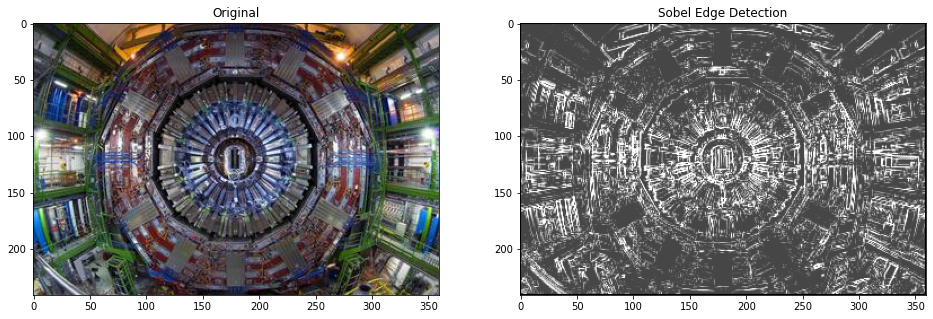

In [37]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
# I now try to do my sobel
def edge_sobel(img, threshold = 70):
    import numpy as np
    
    image = rgb2gray(img) # Convert color image to gray scale
    len_x = image.shape[0]
    len_y = image.shape[1]
    
    Gx = np.array([[+1, +2, +1], [0,0,0], [-1,-2,-1]])
    Gy = np.array([[-1,0,+1],[-2,0,+2],[-1,0,+1]])
    
    mag = np.zeros((len_x, len_y))
    step=0
    
    for i in np.arange(1, len_x-1):
        for j in np.arange(1, len_y-1):
            S1=0;
            S2=0;
            for n in np.arange(-1,2):
                for m in np.arange(-1,2):
                    S1+= Gx[n,m]*image[i+n,j+m]
                    S2+= Gy[n,m]*image[i+n,j+m]
                    #print(np.sqrt(S1**2 + S2**2))

            step=max(np.around(np.sqrt(S1**2 + S2**2), 0), threshold)
            
            if (step>255):
                mag[i,j] = 255
            elif (step<0):
                mag[i,j] = 0
            else :
                mag[i,j] = step
    
    # Normalize the image
    mag = mag.astype(np.uint8)
    return mag

# importing the image
image_file = "Assets/Images/cms_2.jpg"
image = Image.open(image_file)

sobel_img = edge_sobel(np.array(image))

# Display it
fig = plt.figure(figsize=(16, 12))

# Plot original image
a=fig.add_subplot(1, 2, 1)
image_plot_1 = plt.imshow(image)
a.set_title("Original")

# Plot image after Sobel algorithm
a=fig.add_subplot(1, 2, 2)
image_plot_2 = plt.imshow(sobel_img, cmap="gray")
a.set_title("Sobel Edge Detection")
plt.show()

## 4.4. Creating a simple CNN

We will build an easy CNN, but we will use a different grammar, still in Keras: the Keras' *Functional API* [1], instead of the one used above, the *Sequential API* [2]; 

As stated in the Keras' documentation:

*The Keras functional API is a way to create models that are more flexible than the tf.keras.Sequential API. The functional API can handle models with non-linear topology, shared layers, and even multiple inputs or outputs.*


---------
[1] https://keras.io/guides/functional_api/

[2] https://hanifi.medium.com/sequential-api-vs-functional-api-model-in-keras-266823d7cd5e

In [38]:
#######################################################################################################################
# Import relevant Keras classes

# Input layer 
from keras.layers import InputLayer, Input
# The Dense Layer
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Reshape, AveragePooling1D

# Sequential class for instantiating the Model
from keras.models import Sequential
from keras import Model # If we want to use the Keras API

# To get the Activation functions
from keras.layers import Activation


#######################################################################################################################
# Input-Output defs

input_shape = np.shape(X_train)[1]   # Input layer takes [number of vectors, size of vectors, features-per-vector] = [#size_dataset, 1000, 1]
num_classes = 3 # RGB

CHANNEL_DEPTH = 500   # Each histograms has 500 channels
num_sensors = 1       # We have only 1 histogram per data

#######################################################################################################################
# Defining the model
#######################################################################################################################

#######################################################################################################################
# Input

input_shape = np.shape(X_train)[1]   # Input layer takes [number of vectors, size of vectors, features-per-vector] = [#size_dataset, 1000, 1]
num_classes = 3 # RGB

CHANNEL_DEPTH = 500
num_sensors = 1


#############
# input
inputs = Input(shape=(input_shape, ))
x = Reshape( (CHANNEL_DEPTH, num_sensors), input_shape=(input_shape, )) (inputs)

#############
# CNN entry part; 3x (2xConv1D + BatchNorm + MaxPool)

# 1.1 - 2 conv1D
x = Conv1D(filters=32, kernel_size=3, activation='relu', 
                   input_shape = (CHANNEL_DEPTH, num_sensors)
                  )(x)
x = Conv1D(filters=32, kernel_size=3, activation='relu')(x)
x = MaxPooling1D(2)(x) 


# 1.2 - 2 conv1D
x = Conv1D(filters=64, kernel_size=3, activation='relu')(x)
x = Conv1D(filters=64, kernel_size=3, activation='relu')(x)
x = MaxPooling1D(2)(x)


# 1.3 - 2 conv1D
x = Conv1D(filters=128, kernel_size=3, activation='relu')(x)
x = Conv1D(filters=128, kernel_size=3, activation='relu')(x)
x = Conv1D(filters=128, kernel_size=3, activation='relu')(x)
x = MaxPooling1D(2)(x)


#############
# Final pooling
x = AveragePooling1D(pool_size=16, strides=1, padding='valid')(x)
x = Flatten()(x)

#############
#  Last layer - output
outputs = Dense(num_classes, activation='sigmoid')(x)


# Final model definition
model_CNN = Model(inputs=inputs, outputs=outputs, name="my_first_1DCNN")

print(model_CNN.summary())

Model: "my_first_1DCNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 500)]             0         
                                                                 
 reshape (Reshape)           (None, 500, 1)            0         
                                                                 
 conv1d (Conv1D)             (None, 498, 32)           128       
                                                                 
 conv1d_1 (Conv1D)           (None, 496, 32)           3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 248, 32)          0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 246, 64)           6208      
                                                    

We use again graphviz to show graphically illustrate the model 

In [39]:
keras.utils.plot_model(model_CNN, show_shapes=True, dpi=76, to_file="CNN_lecture.png")

AttributeError: module 'keras.utils' has no attribute 'plot_model'

#### 4.4.1 Training the model

In [40]:
############################
# Training - prerequisites
loss_used = 'binary_crossentropy'

model_CNN.compile(loss=loss_used,
                 optimizer='adam',
                 )
# We need to pick the size of the batch used for the training
BATCH_SIZE = 200 
# And the number of epochs on which we train the dataset
EPOCHS = 5 

In [41]:
import datetime
starting_time = datetime.datetime.now() 

print('\nStart training model: \n')

##########################################################
# TRAINING

history_CNN = model_CNN.fit(X_train,
                       y_train,
                       batch_size=BATCH_SIZE,
                       epochs=EPOCHS,
                       #callbacks=callbacks_list,
                       validation_data=(X_test, y_test),
                       verbose=1)

print('\n\nTraining done...\n')

now = datetime.datetime.now()
total_training_time = now-starting_time
print('Total training time: ', total_training_time)


Start training model: 

Epoch 1/5
104/104 [==============================] - 20s 183ms/step - loss: 0.5105 - val_loss: 0.4956
Epoch 2/5
104/104 [==============================] - 19s 183ms/step - loss: 0.4835 - val_loss: 0.4817
Epoch 3/5
104/104 [==============================] - 18s 169ms/step - loss: 0.4800 - val_loss: 0.4871
Epoch 4/5
104/104 [==============================] - 18s 169ms/step - loss: 0.4754 - val_loss: 0.4842
Epoch 5/5
104/104 [==============================] - 17s 167ms/step - loss: 0.4742 - val_loss: 0.4760


Training done...

Total training time:  0:01:31.613898


#### 4.4.2 Evaluating the model

In [ ]:
# summarize history for loss
plt.figure(figsize=(10, 7))

plt.plot(history_CNN.history['loss'])
plt.plot(history_CNN.history['val_loss'])

plt.title('Model loss', fontsize=20,  pad=10)

plt.ylabel('loss', fontsize=18)
plt.xlabel('epoch', fontsize=18)

plt.legend(['loss', 'val_loss'], loc='upper right', fontsize=12)

plt.show()

In [ ]:
##########################################################
# SAVING

# serialize weights to HDF5
time_string = now.strftime("%Y-%m-%d-%H-%M-%S")    
name_to_save = 'model_CNN_w_batchsize' + str(BATCH_SIZE) + '_epochs' + str(EPOCHS) +  '_v' + time_string 
path_to_model = 'Model_data/' +  name_to_save + '.h5'
model_CNN.save(path_to_model)
print("Saved model to disk")

#### 4.4.3 Recolor the image with trained CNN

In [ ]:
import PIL
filename = "Rawdata+RGB/Putto_Area1_fiori"
xrf_img = np.load(f"{filename}.npz")['img']
print (f"Shape of the loaded XRF image: {xrf_img.shape}")
true_img = np.asarray(PIL.Image.open(f"{filename}.jpg"))
print (f"Shape of the loaded RGB image (true): {true_img.shape}")

pixels = xrf_img.reshape ((-1, 500))
CNN_recolored_image = model_CNN.predict (pixels).reshape (xrf_img[:,:,:3].shape)[:,::-1]


plt.figure(figsize=(10,10), dpi=100)
plt.subplot(121)
plt.title ("Flowers (true)")
plt.imshow (true_img)
plt.subplot(122)
plt.title ("Flowers (reconstructed with CNN)")
plt.imshow (CNN_recolored_image)
plt.show()

In [ ]:
total_distance_error, RGB_error = distance_in_RGB(
    np.flip(CNN_recolored_image, axis=1), 
    np.array(true_img)[0:255, : , :]/255   # The two images are not exactly the same size, so we drop the extra lines we have
)

returned_ce = compute_cross_entropy(
    np.flip(CNN_recolored_image, axis=1), 
    np.array(true_img)[0:255, : , :]/255   # The two images are not exactly the same size, so we drop the extra lines we have
)

In [ ]:
# Generate random RGB pixel
original_test = np.random.randint(0, 255, size=3)/255
print(f'Random pixel: {original_test}')

# Shift it
shifted_test = np.clip(original_test - RGB_error, 0, 1.)

# Show them
print('Subtracting:')
show_computed_pixel_vs_true_pixel(shifted_test, original_test)

## 5. Conclusions & Outlook

We have seen how to use Dense Deep Neural Network and Convolutionale Neural Network applied on Physical Imaging raw data, in order to start a process of digital restoration of cultural heritage; 

One may ask what is the goal of "recolor" an XRF (or PIXE, PIGE, FTIR, etc) raw data, if the painted surface is just in fron of our eyes. 

Well, that's not always true. One of the properties of physical imaging, is its ability to penetrate into the target; the depth of the penetration is related to the energy of the incoming X-ray via the *stopping power factor*; this means we are able to receive information about the interal layer of the painting (if present) .

<div style="margin-bottom: 40em;">
<img src="./Rawdata+RGB/ragtriste_VISscalato.png" alt="Drawing" style="float: left; margin-top: 15px; width: 45%"/>
<img src="./Rawdata+RGB/ragazzo_triste_dietro.jpg" alt="Drawing" style="float: right; margin-top: 15px; width: 45%"/>
</div>
    
This would thus imply that, in principle, we are able to explore previous, submersed pictoric layer of the painting!

The goal is now clear: try to use a sufficiently deep neural network to *reconstruct* the submersed layers and thus artificially restore the forgotten image, without the need of invasive operations on the painting!



<img src="./Assets/Images/XKCD_1.jpg" alt="Drawing" style="float: center; margin-top: 15px; width: 35%"/>





--------------

<div>
<img src="./Assets/Pics/Logo_INFN_CHNet_esteso.png" alt="Drawing" style="float: left; width: 250px;"/>
<img src="./Assets/Pics/EOSc-Pillar_logo_final_Squared.png" alt="Drawing" style="float: right; width: 250px;"/>
</div>
